# Water Potability Project

# Introduction
Access of potable water i.e. the water that isn't harmful for our health is a basic human right. However, the availablity of potable water is still a topic of discussion in every corner of the world. In this project I'm trying to figure out what are the factors that majorly affect the potability of water and at the end I'll a write a machine learning algorithm which will predict whether the water is safe for drinking or not. Later I will use the trained and tuned model for making a user friendly web application where the user can change value of different constituents and will get the potability as the output.
<br>

# Importing libraries

In [1]:
#Important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')
import joblib as jb

#Important functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

#Model
from sklearn.tree import DecisionTreeClassifier

# Loading the data

In [2]:
train_df=pd.read_csv('/content/water_potability.csv')
train_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Column Description
1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

# Exploratory Data Analysis

In [3]:
train_df.shape #(Rows,Columns)

(3276, 10)

In [4]:
train_df.info()
#all features, total number of tuples and data type of `train` data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
#Statistical Information
train_df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# Data Visualization

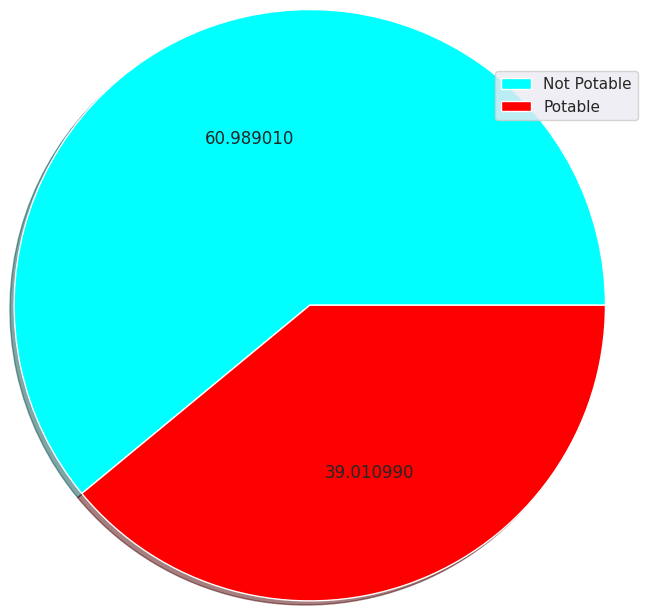

In [6]:
plt.pie(train_df['Potability'].value_counts(),shadow=True, autopct="%f", colors=['aqua', 'red'], radius=2)
plt.legend(['Not Potable','Potable'],loc=(1,1));

#### A large portion of given water samples is not potable.

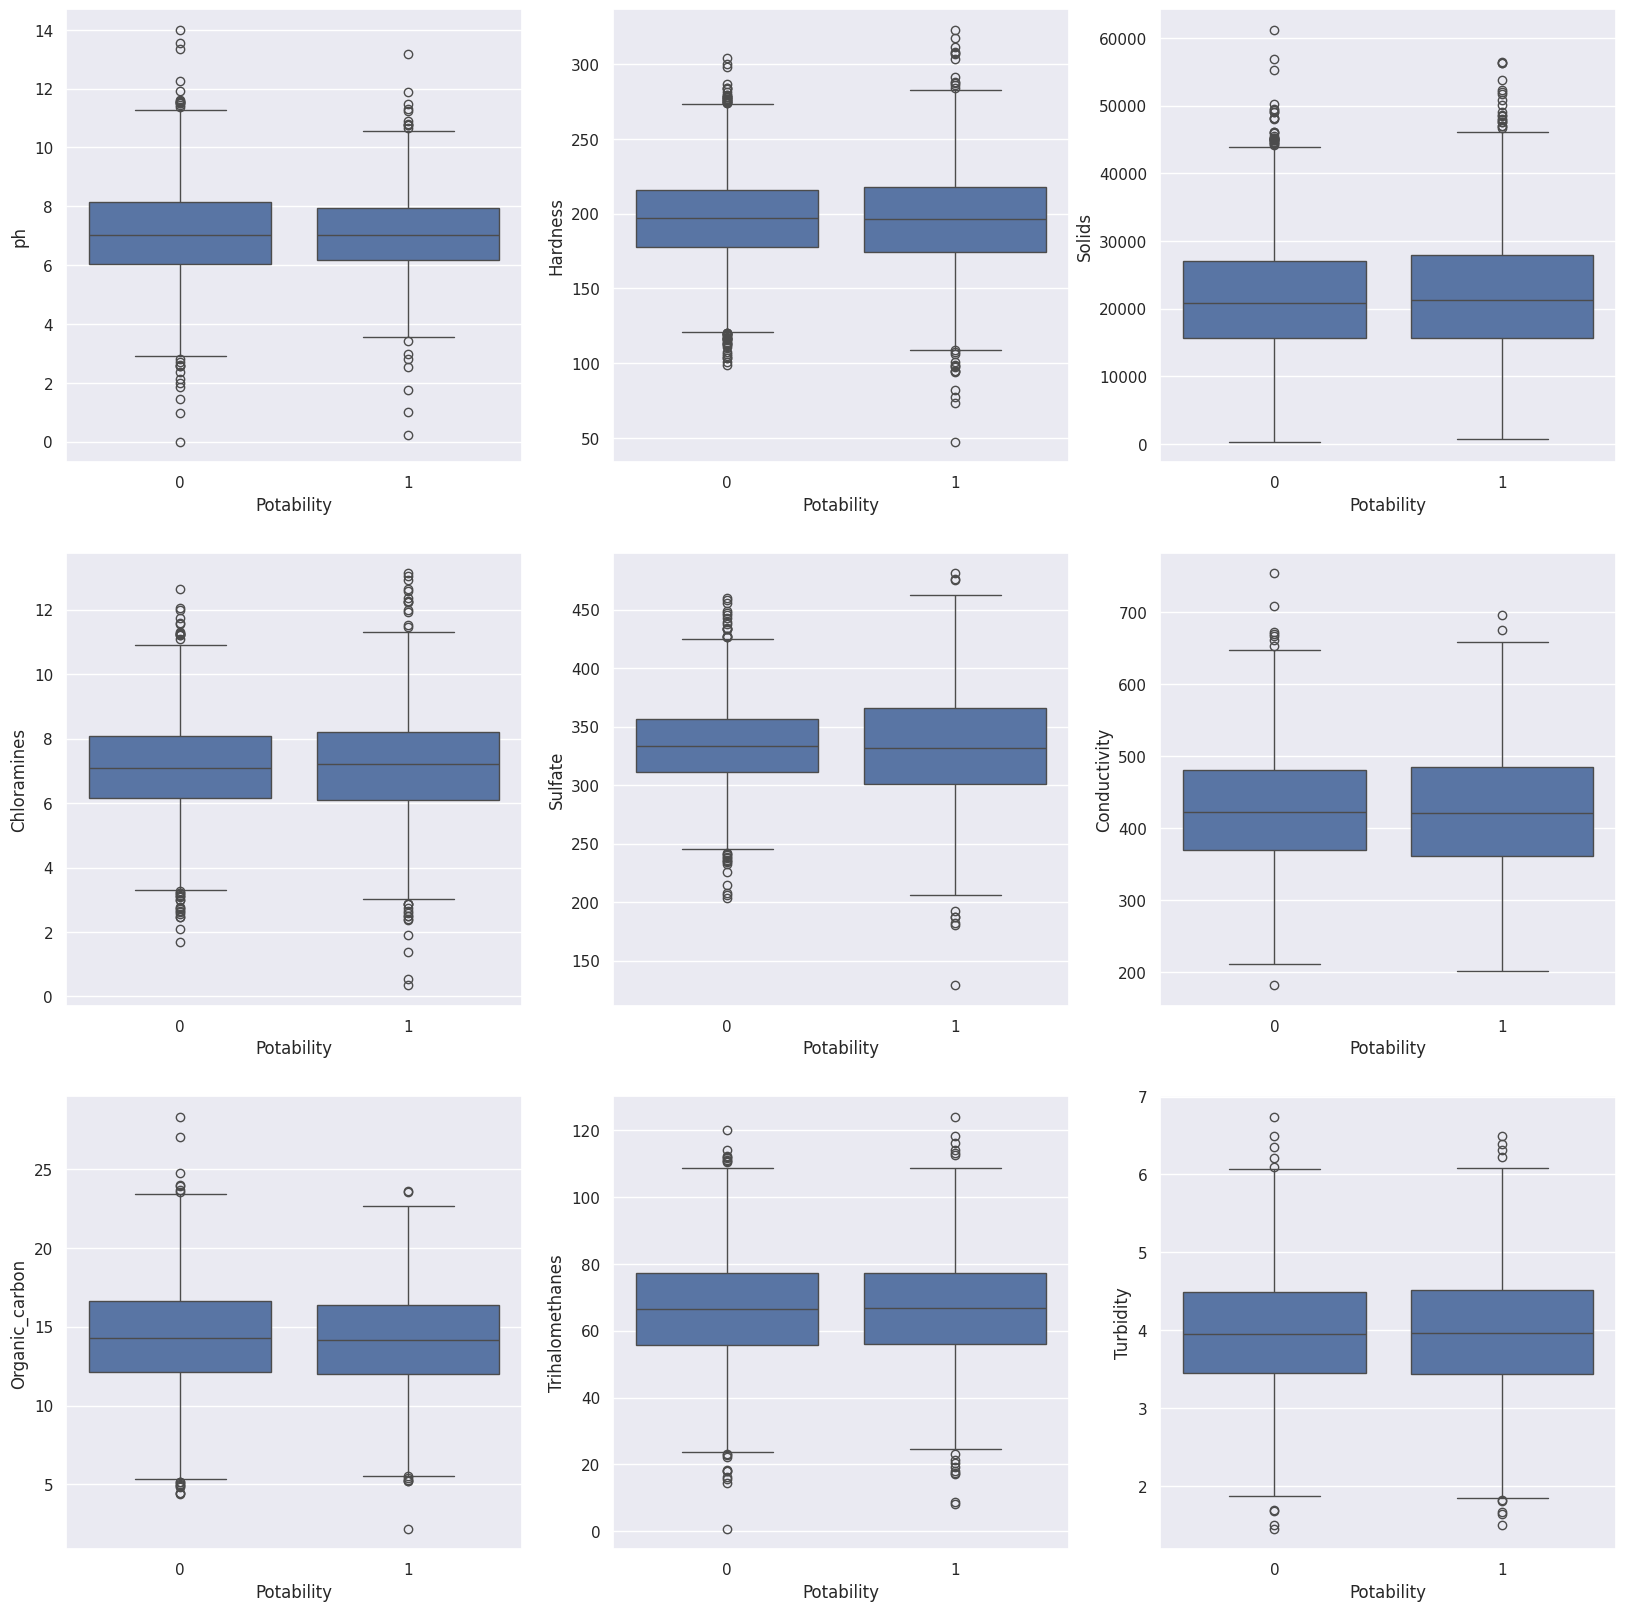

In [7]:
#Now we will try to find the relationship of numerical attributes with potability
attributes=[ 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
            'Organic_carbon', 'Trihalomethanes', 'Turbidity']
used_attribute_list=[]
fig, axes = plt.subplots(3,3, figsize=(20, 20))
k=0
for i in [0, 1, 2]:
    for j in [0,1,2]:
        sns.boxplot(x=train_df.Potability, y=train_df[attributes[k]], ax=axes[i,j])
        k=k+1

#### The individual relationship of independent variable with dependent variable is of least significant.

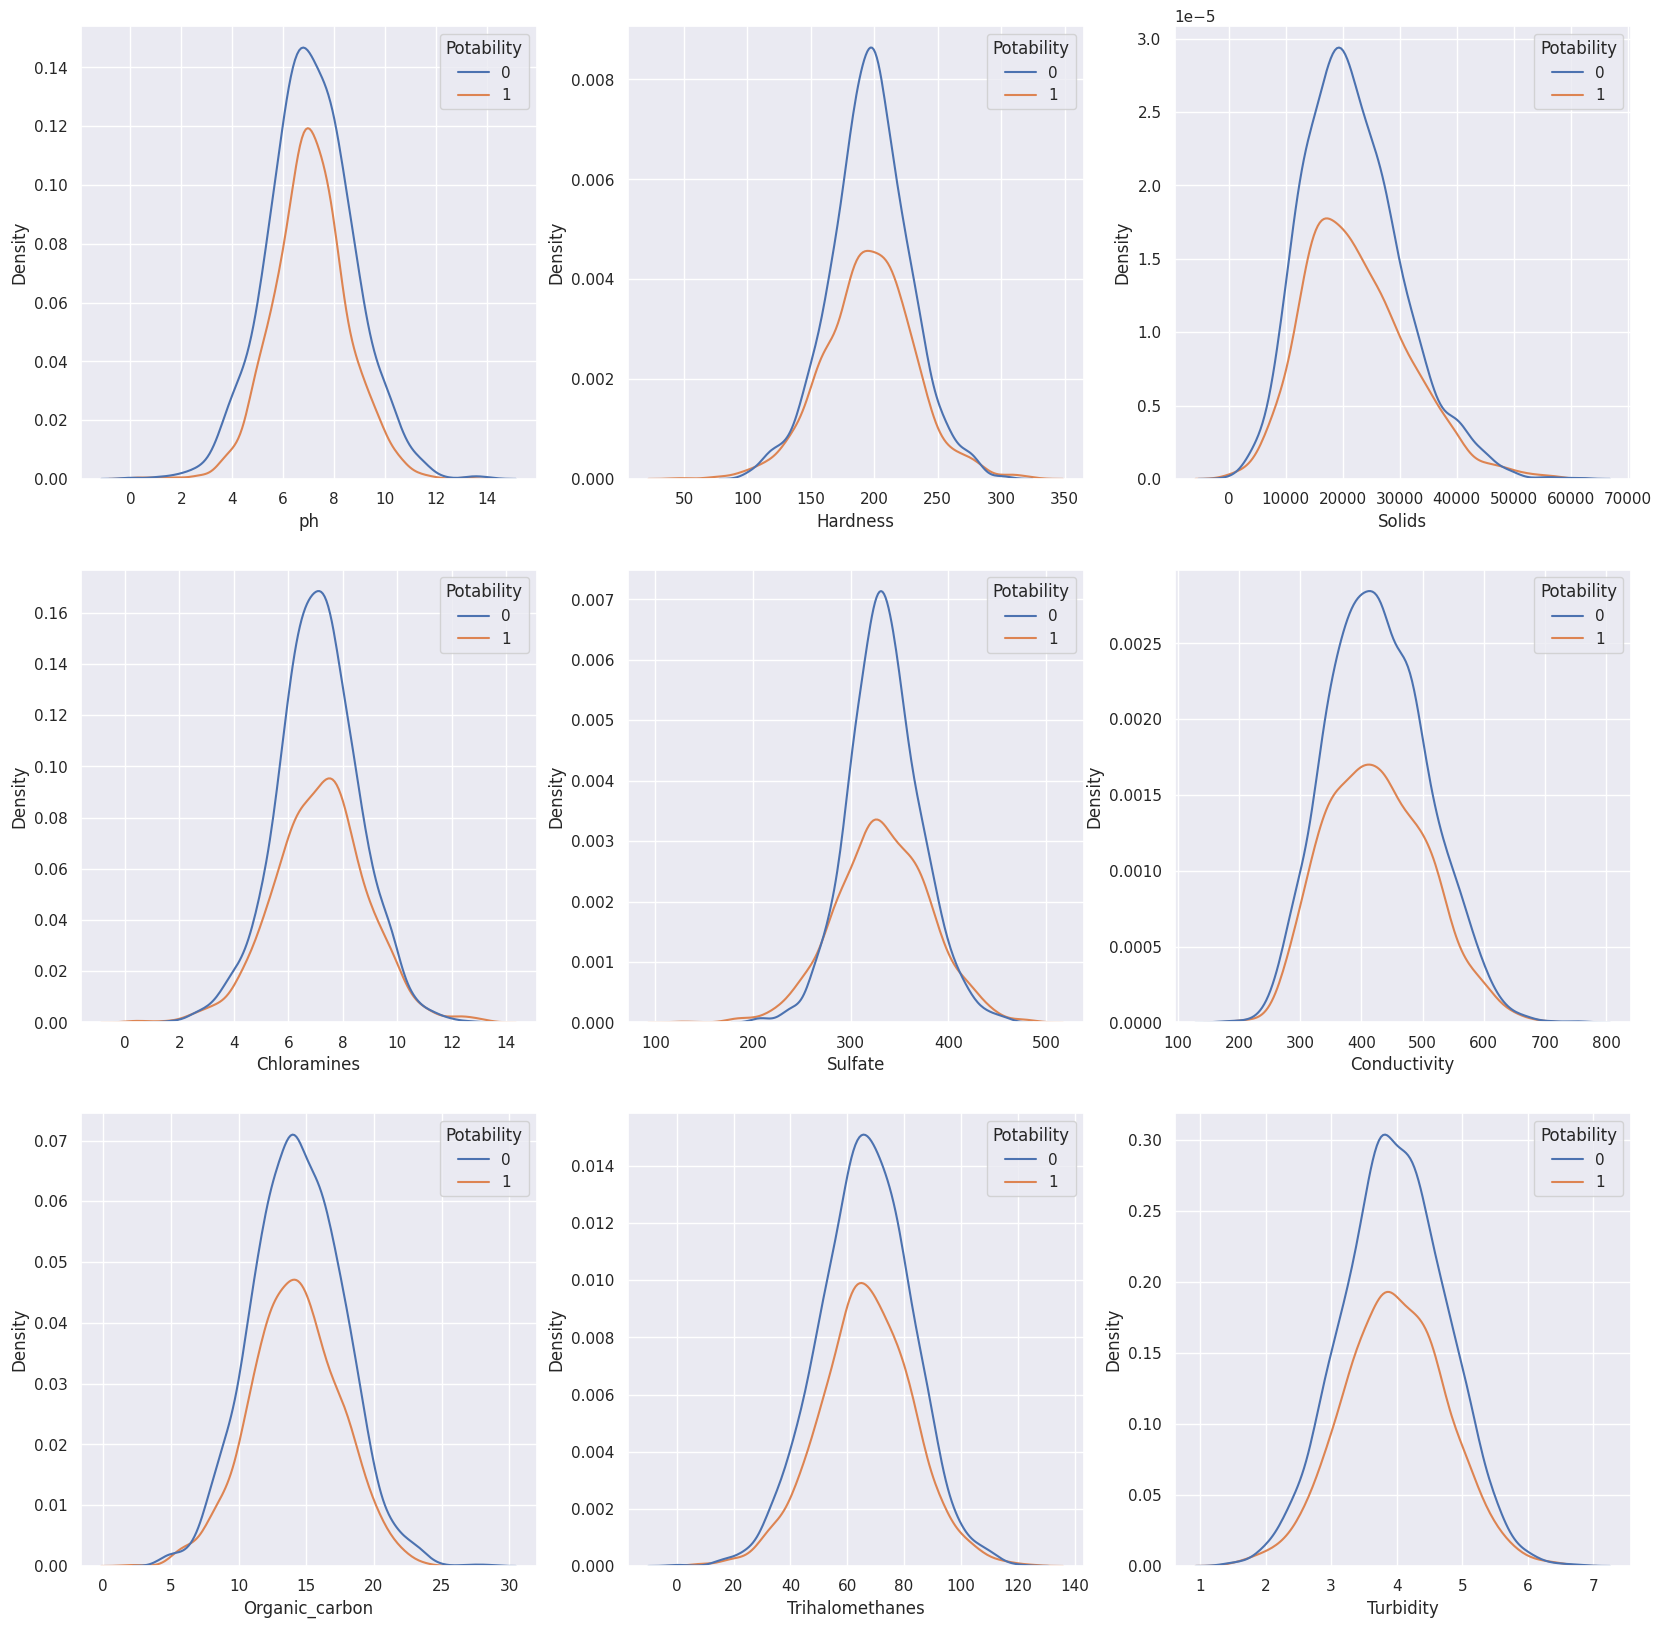

In [8]:
#Now we will try to find the relationship of numerical attributes with potability
attributes=[ 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
            'Organic_carbon', 'Trihalomethanes', 'Turbidity']
used_attribute_list=[]
fig, axes = plt.subplots(3,3, figsize=(20, 20))
k=0
for i in [0, 1, 2]:
    for j in [0,1,2]:
        sns.kdeplot(hue=train_df.Potability, x=train_df[attributes[k]], ax=axes[i,j])
        k=k+1

#### All the attributes follow almost the same distribution (with differing heights) and their average lies near the same data points irrespective of the potability.

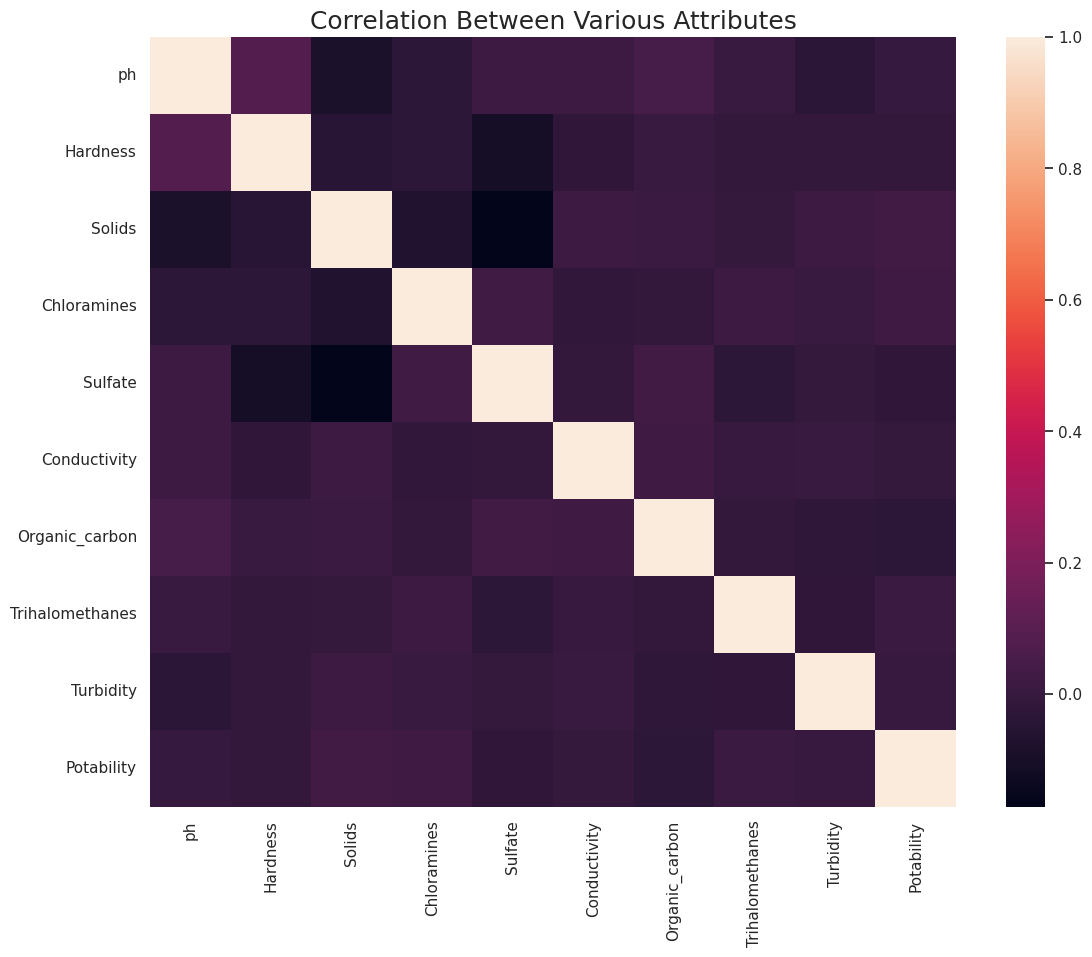

In [9]:
plt.figure(figsize=(13,10))
sns.heatmap(train_df.corr())
plt.title('Correlation Between Various Attributes', fontsize=18);

#### There isn't any significant correlation between any of the attributes.

# Missing Values
**Getting the missing values :** We will find out all the missing values from the dataset using `insa()`.

In [10]:
#Missing values from the train data
train_df.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


**Filling the missing values:** We will conditional mapping for filling the missing values.

In [11]:
cond=train_df['Potability']==0

train_df['ph'].fillna(cond.map({True:train_df.loc[train_df['Potability']==0]['ph'].median(),
                                False:train_df.loc[train_df['Potability']==1]['ph'].median()
                                }),inplace=True)

train_df['Sulfate'].fillna(cond.map({True:train_df.loc[train_df['Potability']==0]['Sulfate'].median(),
                                False:train_df.loc[train_df['Potability']==1]['Sulfate'].median()
                                }),inplace=True)

train_df['Trihalomethanes'].fillna(cond.map({True:train_df.loc[train_df['Potability']==0]['Trihalomethanes'].median(),
                                False:train_df.loc[train_df['Potability']==1]['Trihalomethanes'].median()
                                }),inplace=True)

In [12]:
train_df.isna().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [13]:
train_df.to_csv('water_potability_preprocessed.csv', index=False)

# Scaling
We will scale down all the data points in the range of 0 to 1, so that our algorithm doesn't have to deal with variety of wide ranges.

In [14]:
#Min-Max range before scaling
train_df.describe().T[['min','max']].T

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
min,0.0,47.432,320.942611,0.352,129.000000,181.483754,2.2,0.738,1.450,0.0
max,14.0,323.124,61227.196010,13.127,481.030642,753.342620,28.3,124.000,6.739,1.0


In [15]:
input_cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

In [16]:
scaler = MinMaxScaler()
scaler.fit(train_df[input_cols])
train_df[input_cols] = scaler.transform(train_df[input_cols])
train_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.502533,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0
1,0.265434,0.297400,0.300611,0.491839,0.580601,0.719411,0.497319,0.450999,0.576793,0
2,0.578509,0.641311,0.321619,0.698543,0.580601,0.414652,0.562017,0.532866,0.303637,0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0


In [17]:
#Min-Max range after scaling
train_df.describe().T[['min','max']].T

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# Modeling

In [18]:
#Seperating Response Variable from the dataset
X=train_df.drop('Potability',axis=1)
y=train_df['Potability']

In [19]:
X.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [20]:
#train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [21]:
clf=DecisionTreeClassifier(random_state=41,max_depth=6,min_samples_split=0.03)
clf.fit(X_train, y_train)
Y_pred=clf.predict(X_test)
pred=clf.predict(X_train)
print("Accuracy of training data :",accuracy_score( y_train.values,pred))
print("Accuracy of validation data :",accuracy_score(y_test.values,Y_pred))

Accuracy of training data : 0.8005698005698005
Accuracy of validation data : 0.7814407814407814


**Note :** One should adjust the values of the classifier such that the validation accuracy increases even if it causes reduction in training accuracy, this process is called **hyper-parameter tuning**. You can read more about it [here](https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680).

# Confusion Matrix
We had earlier seen that the large portion of water samples is not potable, that means our dataset is imbalanced and we need confusion matrix to evaluate our model.

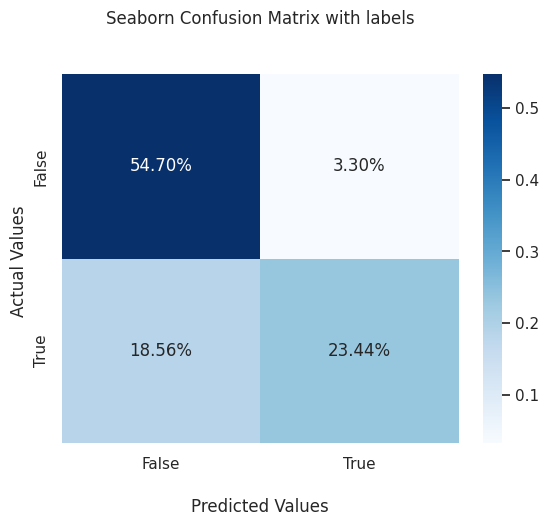

In [22]:
cf_matrix=confusion_matrix(y_test,Y_pred)
labels=['True Negative','False Positive','False Negative','True Positive']
labels=np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

#### As we can see that the True Positive and True Negative percentages are higher than that of False Positive (aka Type-I Error) and False Negative (aka Type-II Error), we can safely that our model makes fair predictions.

# Feature Importance
It highlights which features passed into a model have a higher degree of impact for generating a prediction than others.

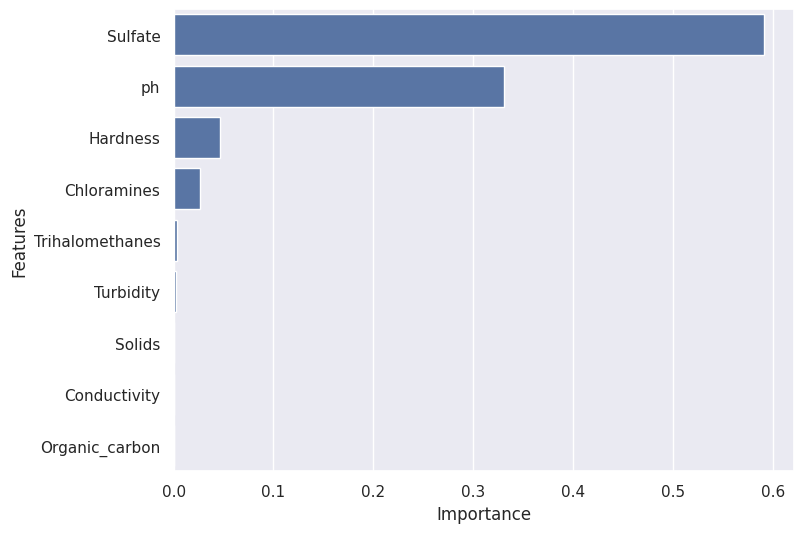

In [23]:
feature_importance = pd.DataFrame({'Features':X.columns,
                                   'Importance':clf.feature_importances_
                                  }).sort_values('Importance', ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Features']);


# Decision Tree

In [24]:
from sklearn import tree
plt.figure(figsize=(20,20),dpi=500)
tree.plot_tree(clf,feature_names=attributes, class_names=None,filled=True,rounded=True)
plt.show();

# Saving the Model
We will save the model using joblib to use it later in our web application.

In [25]:
water_potability_predictor = {
    'model': clf,
    'scaler': scaler,
    'input_cols': input_cols
}
jb.dump(water_potability_predictor, 'water_potability_predictor.joblib')

['water_potability_predictor.joblib']

# Conclusion
<div class="alert alert-block alert-info">
    <p style="color:Black;">
        1) This model classifies the data with fair accuracy of 78.14%. <br>
        2) Even though there isn't any significant correlation between any of the
        independent attributes or independent and dependent attribute, there are few
        attribute which play measure role in classification.<br>
        3) From the bar chart of feature importance we can conclude that our model gives
        high priority to the sulfate concentration and pH of the water for classification
        <br>
        4) Similiary our model gives zero importance to the factors like total solid
        dissolved, conductivity and total organic carbon (TOC) in source waters, implying
        that they are less effective in determining the potability of water.
    </p>
 </div>

Thank You !